1. Derivados de Sobel y Scharr

Los operadores de Sobel son una operación conjunta de suavizado gaussiano más diferenciación, por lo que son más resistentes al ruido. Puede especificar la dirección de las derivadas que se tomarán, vertical u horizontal (mediante los argumentos, yorder y xorder respectivamente). También puede especificar el tamaño del kernel mediante el argumento ksize. Si ksize = -1, se utiliza un filtro Scharr de 3x3 que da mejores resultados que el filtro Sobel de 3x3. Consulte los documentos para conocer los núcleos utilizados.

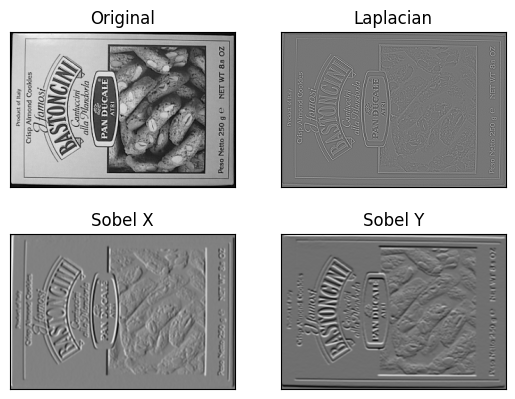

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('resources/box.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

En nuestro último ejemplo, el tipo de datos de salida es cv.CV_8U o np.uint8. Pero hay un pequeño problema con eso. La transición de negro a blanco se toma como pendiente positiva (tiene un valor positivo), mientras que la transición de blanco a negro se toma como una pendiente negativa (tiene un valor negativo). Entonces, cuando convierte datos a np.uint8, todas las pendientes negativas se convierten en cero. En palabras simples, pierdes esa ventaja.

Si desea detectar ambos bordes, una mejor opción es mantener el tipo de datos de salida en algunas formas superiores, como cv.CV_16S, cv.CV_64F, etc., tomar su valor absoluto y luego convertirlo nuevamente a cv.CV_8U. El siguiente código demuestra este procedimiento para un filtro Sobel horizontal y la diferencia en los resultados.

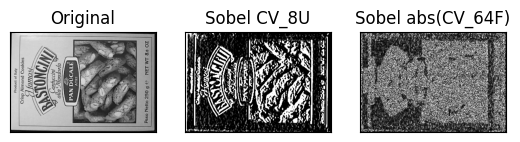

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('resources/box.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# Output dtype = cv.CV_8U
sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()